# Exercise 14: Mediation

This homework assignment is designed to give you practice with mediation. You won't need to load in any data for this homework -- we'll simulate data instead.

---
## 1. Simulating data (3 points)


In this homework, we're going to simulate the relationship between age, word reading experience, and reading comprehension skill. Older children tend to be better at reading comprehension tasks, but this isn't just an inherent part of getting older. It's a combination of gaining more experience with reading, oral language skills, and executive functions development. In this homework, though, we're going to simplify this relationship down to a direct effect of age on reading comprehension (since improvements in oral language skills and executive functions are more guaranteed as children age than reading practice is), and a mediation of word reading experience.

In graphical form: 
![picture](https://drive.google.com/uc?id=1wdm9xuiJhBJor99-9GnicO2_rzkGWtfN)

Writing the relationship out formally: 

$$x = \beta_{xa} a + \beta_{x0} + \epsilon_{x}$$

$$c = \beta_{ca} a + \beta_{cx} x + \beta_{c0} + \epsilon_c$$



$c$ is reading comprehension, $x$ is word reading experience, and $a$ is age. $\beta_{c0}$ and $\beta_{x0}$ are intercept terms for their respective formulas, and $\epsilon_{c}$ and $\epsilon_{x}$ are gaussian noise terms. We'll start by writing a function, `simulate_data`, that can simulate this relationship. The input values are set and the function structure is provided below. Complete the function such that it takes in those input variables and generates $age$, $x$, and $c$ values. Use `runif()` to generate ages. Use `rnorm()` to generate the noise terms. 

In [15]:
library(tidyverse)

sample_size = 100 # How many children in data set? 
age_lo = 80     # minimum age, in months
age_hi = 200    # maximum age, in months
beta_xa = 0.5   # amount by which experience changes for increase of one month in age
beta_x0 = -5    # amount of experience when age = 0 (not interpretable, since minimum age for this data is 80 months)
sd_x = 50       # standard dev of gaussian noise term, epsilon_x
beta_ca = 0.8   # amount that comprehension score improves for every increase of one unit in age
beta_cx = 3     # amount that comprehension score improves for every increase of one unit in reading experience
beta_c0 = 10    # comprehension score when reading experience is 0. 
sd_c = 85      # standard dev of gaussian noise term, epsilon_c

simulate_data <- function(sample_size, age_lo, age_hi, beta_xa, 
                          beta_x0, sd_x, beta_ca, beta_cx, beta_c0, sd_c) {
      # WRITE YOUR CODE HERE
      #Try 

     # Create an empty dataframe with specified column names
      # Create the dataframe with random numbers generated from a uniform distribution
      sim_df <- data.frame(
      a = runif(sample_size, min = age_lo, max = age_hi)
      )
      sim_df <- sim_df %>%
            # simulate experience
            mutate(x = beta_xa * a + beta_x0 + rnorm(sample_size, sd = sd_x)) %>%
            #simulate comprehension
            mutate(c = beta_ca * a + beta_cx * x + beta_c0 + rnorm(sample_size, sd = sd_c))

      return (sim_df)
      
}

dat <- simulate_data(sample_size, age_lo, age_hi, beta_xa, beta_x0, sd_x, beta_ca, beta_cx, beta_c0, sd_c)
head(dat)

,a,x,c
,<dbl>,<dbl>,<dbl>
1,188.2005,57.85425,242.3946
2,194.3573,127.10685,598.5657
3,156.7257,50.55994,408.6048
4,103.2994,27.52580,147.6727
5,168.4961,24.16113,199.7743
6,112.0449,-28.14237,105.9065


In [ ]:
#?rnorm()

---
## 2. Visualizing Data (2 point)

Load the `tidyverse` library.

In [16]:
# WRITE YOUR CODE HERE
library(tidyverse)

a) Plot the relationship between age and reading comprehension. 

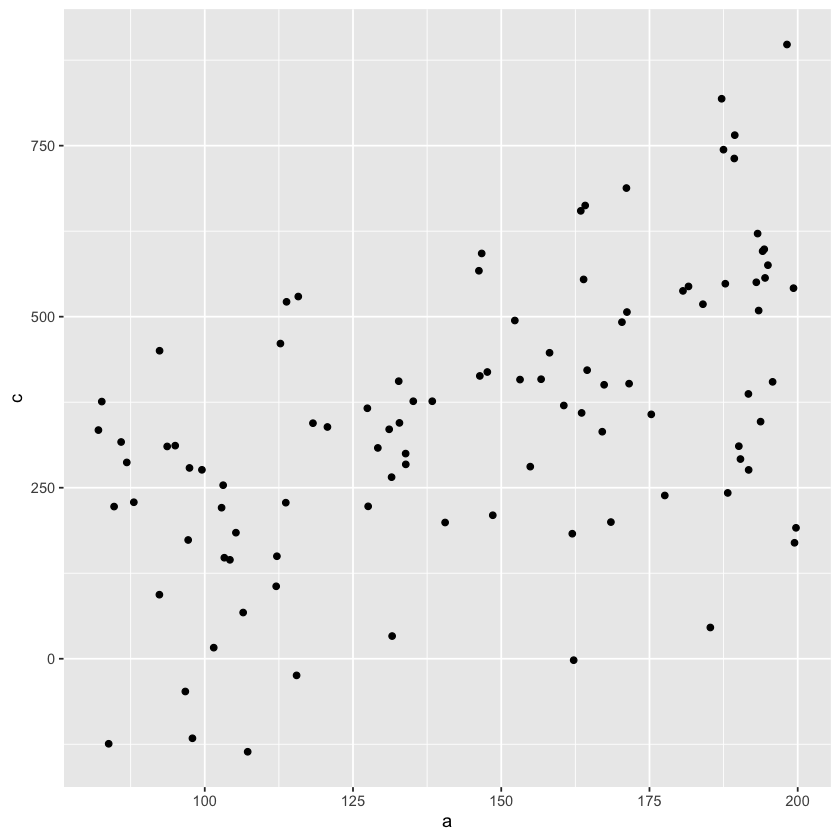

In [17]:
# WRITE YOUR CODE HERE

# ggplot(d1, aes(x=FS_Total_GM_Vol,y=FS_IntraCranial_Vol, color=Gender)) + 
#     geom_point()

ggplot(dat, aes(x = a,y = c)) +
    geom_point()


b) Plot the relationship between reading experience, age, and reading comprehension.

`geom_smooth()` using formula = 'y ~ x'


Warning message:
“The following aesthetics were dropped during statistical transformation: colour
ℹ This can happen when ggplot fails to infer the correct grouping structure in
  the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical
  variable into a factor?”


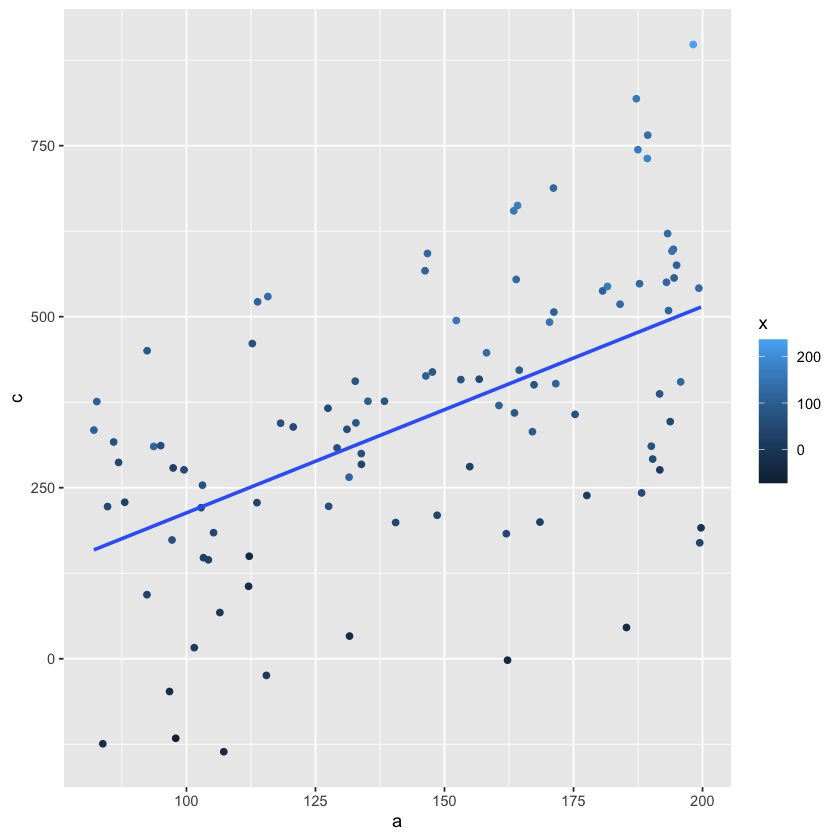

In [21]:
# WRITE YOUR CODE HERE
ggplot(dat, aes(x = a, y = c, color=x)) +
    geom_point() + 
    geom_smooth(method="lm",se=FALSE)

---
## 3. Mediation Analysis (4 points)

Load the `mediation` library.

In [20]:
# WRITE YOUR CODE HERE
library(mediation)


Use the `mediate` function to determine whether `x` mediates the relationship between `age` and `c`. Use `summary()` to print the model results. *Hint: see the mediation and moderation tutorial.*

In [22]:
# WRITE YOUR CODE HERE
# age is IV
# x is the mediator
# c is DV

#Step 1: IV on M, Number of passengers predicting weight of car
fitM <- lm(x ~ a,     data=dat) 
#Step 2: IV and M on DV, Number of passengers and weight predicting highway
fitY <- lm(c ~ a + x, data=dat) 
summary(fitM)
summary(fitY)
fitMed <- mediate(fitM, fitY, treat="a", mediator="x")
summary(fitMed)



Call:
lm(formula = a ~ x, data = dat)

Residuals:
    Min      1Q  Median      3Q     Max 
-73.869 -21.781  -1.142  23.626  77.002 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 124.06294    5.64378  21.982  < 2e-16 ***
x             0.28941    0.06025   4.803 5.62e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 33.89 on 98 degrees of freedom
Multiple R-squared:  0.1906,	Adjusted R-squared:  0.1823 
F-statistic: 23.07 on 1 and 98 DF,  p-value: 5.618e-06



Call:
lm(formula = c ~ a + x, data = dat)

Residuals:
    Min      1Q  Median      3Q     Max 
-193.37  -50.52    2.01   51.34  180.86 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -23.8353    32.0465  -0.744    0.459    
a             0.9978     0.2355   4.236 5.17e-05 ***
x             3.0661     0.1561  19.636  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 79.01 on 97 degrees of freedom
Multiple R-squared:  0.8584,	Adjusted R-squared:  0.8555 
F-statistic: 294.1 on 2 and 97 DF,  p-value: < 2.2e-16



Causal Mediation Analysis 

Quasi-Bayesian Confidence Intervals

               Estimate 95% CI Lower 95% CI Upper p-value    
ACME              0.000        0.000         0.00       1    
ADE               0.996        0.537         1.46  <2e-16 ***
Total Effect      0.996        0.537         1.46  <2e-16 ***
Prop. Mediated    0.000        0.000         0.00       1    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Sample Size Used: 100 


Simulations: 1000 


---
## 5. Reflection (1 point)
How do you interpret these results? Why do you think the analysis yielded this result?

> *Write your response here* 
> Because the ACME term is not statically significant, I interpret that experience does not mediate the effect of age on reading comprehension.  It may have yielded this result because  reading experience moderates vs mediates the effect of age on reading comprehension.

Both direct and inderect. 

**DUE:** 5pm EST, April 1, 2024

**IMPORTANT** Did you collaborate with anyone on this assignment? If so, list their names here. 
> *Someone's Name*